In [55]:
#************************#  
#* Sima Shafaei         *# 
#* CECS 590-01          *#  
#* Assignment 1         *#  
#************************# 

In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
def dataGeneration1(mu, sigma, num ):
    n=0
    x=np.zeros((num,2))
    while n<num:
        r1=np.random.normal(mu, sigma , 1)
        r2=np.random.normal(mu, sigma , 1)
        if (r1**2 + r2**2)<1 and r1>=0 and r2>=0 :
            x[n,0]=r1
            x[n,1]=r2
            n+=1
    return x  

In [57]:
def dataGeneration2(mu, sigma, num ):
    n=0
    x=np.zeros((num,2))
    while n<num:
        r1=np.random.normal(mu, sigma , 1)
        r2=np.random.normal(mu, sigma , 1)
        if (r1**2 + r2**2)>=1 and 0<=r1<=1 and 0<=r2<=1:
            x[n,0]=r1
            x[n,1]=r2
            n+=1
    return x 

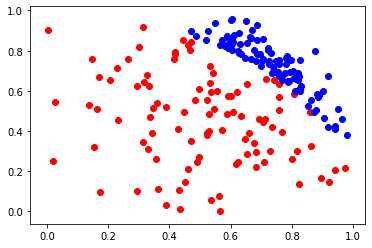

In [58]:
#data generation
x1=dataGeneration1(0.5, 0.08**0.5, 100)
shp=(200,2)
d=np.zeros(shp)
shp=(200,1)
target=np.zeros(shp)
plt.scatter(x1[:,0],x1[:,1],c='red')
for i in range (100):
    d[i,0]=x1[i,0]
    d[i,1]=x1[i,1]
    target[i,0]=0


x2=dataGeneration2(0.5, 0.08**0.75, 100)
plt.scatter(x2[:,0],x2[:,1],c='blue')
for i in range (100):
    d[i+100,0]=x2[i,0]
    d[i+100,1]=x2[i,1]
    target[i,0]=1

In [59]:
def tanh(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    return t

def d_tanh(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    dt=1-t**2
    return dt

def sigmoid(x):
    return 1/(1+np.exp(-x))

def d_sigmoid(x):
    return np.exp(-x)/((1+np.exp(-x))**2)

In [60]:
class NeuralNetwork:
    def __init__(self, x, y,hiddenNode,epoch,alpha):
        
        self.input      = x
        self.weights1   =np.random.rand(self.input.shape[1],hiddenNode) 
   
        self.weights2   =np.random.rand(hiddenNode,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)
        self.alpha      = alpha
        self.epoch      = epoch
    def feedforward(self):
        self.z2=np.dot(self.input, self.weights1)
        self.y_hat2 = tanh(self.z2) #sigmoid(self.z2)
        self.z3=np.dot(self.y_hat2, self.weights2)
        self.y_hat3 = tanh(self.z3)#sigmoid(self.z3)
        self.error=1/self.input.shape[0] * sum(0.5 *(self.y-self.y_hat3)**2)
    def backproppagation(self):        
        d_weights2 = np.dot(self.y_hat2.T, (self.alpha*(self.y - self.y_hat3) * 
                                            d_tanh(self.z3)))
        d_weights1 = np.dot(self.input.T,  np.dot(self.alpha*(self.y - self.y_hat3) *
                                                  d_tanh(self.z3), self.weights2.T) * 
                                                  d_tanh(self.z2))
        
        self.weights1 += d_weights1
        self.weights2 += d_weights2
        
    def fit(self):
        err= np.zeros(self.epoch)
        for k in range(self.epoch):
            self.feedforward()
            self.backproppagation()
            err[k]=self.error
        #plt.figure()
        #plt.plot(err)
        return err 
    
    def test(self,test_data,test_output):
        z2=np.dot(test_data, self.weights1)
        test_y_hat2 = tanh(z2)
        z3=np.dot(test_y_hat2, self.weights2)
        test_y_hat3 = tanh(z3)
        error=1/test_data.shape[0] * sum(0.5 *(test_output-test_y_hat3)**2)
        TP=FP=FN=TN=0
        for i in range(len(y_test)) :
            if test_output[i]==0 and abs(test_y_hat3[i])<=0.5:
                #plt.scatter(test_data[i,0],test_data[i,1],c='green')
                TN+=1
            elif test_output[i]==0 and abs(test_y_hat3[i])>0.5:
                #plt.scatter(test_data[i,0],test_data[i,1],c='red')
                FN+=1
            elif test_output[i]==1 and abs(test_y_hat3[i])>=0.5:
                #plt.scatter(test_data[i,0],test_data[i,1],c='blue')
                TP+=1
            elif test_output[i]==1 and abs(test_y_hat3[i])<0.5:
                #plt.scatter(test_data[i,0],test_data[i,1],c='yellow')
                FP+=1
        return error,(TN+TP)/(TN+TP+FP+FN)
    

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(d, target, test_size=0.2)

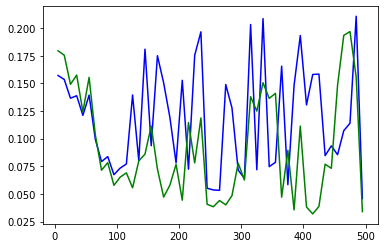

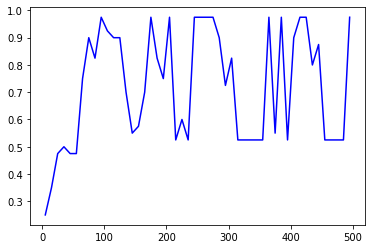

In [66]:
# learn the model:               
trn_err=[]
test_err=[] 
test_acuracy=[]
for i,e in enumerate(range(5,500,10)):
    nn=NeuralNetwork(X_train,y_train,3,e,0.01)
    train_err=nn.fit()
    trn_err.append(train_err[e-1])
    err,acuracy=nn.test(X_test,y_test)
    test_err.append(err)
    test_acuracy.append(acuracy)

plt.figure()
e=range(5,500,10)
plt.plot(e,trn_err,'b')
plt.plot(e,test_err,'g')
plt.figure()
plt.plot(e,test_acuracy,'b')

In [65]:
nn=NeuralNetwork(X_train,y_train,3,150,0.01)
train_err=nn.fit()
test_err=nn.test(X_test,y_test)
print(test_err)

(array([0.11428521]), 0.525)
